# Automatic Sense Making and Explanation

## Task A: Validation

For Task A, I have used text classifiers models from scikit-learn for validation of data.  

### Sorting Imports : 

For imports, I have used 3 main libraries :
1. **Numpy** - For numpy arrays to process with Scikit Learn
2. **Pandas** - Pandas Dataframes for reading and data manupulation
3. **Scikit-Learn** - For implementation of text classification models

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt2
from matplotlib.pyplot import xticks
from nltk.classify.decisiontree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


### File Handling :

Here, I have read the CSV training as well as test(Trial) files along with their labels and transformed the minto pandas dataframe.

In [40]:
trainPath = "/Training  Data/Training  Data/"
testPath = "Trial Data/Trial Data/"

trainDatadf = pd.read_csv(
    "Training  Data/Training  Data/subtaskA_data_all.csv", encoding="utf-8"
)
trainLabeldf = pd.read_csv(
    "Training  Data/Training  Data/subtaskA_answers_all.csv",
    encoding="utf-8",
    header=None,
)

trialDatadf = pd.read_csv(
    "Trial Data/Trial Data/taskA_trial_data.csv", encoding="utf-8"
)
trialLabeldf = pd.read_csv(
    "Trial Data/Trial Data/taskA_trial_answer.csv", encoding="utf-8", header=None
)

As the train and test labels came without a column name, We are renaming them accordingly.

In [41]:
trainLabeldf.rename(columns={0: "id", 1: "label"}, inplace=True)
trialLabeldf.rename(columns={0: "id", 1: "label"}, inplace=True)

The labels given in the training and test datasets are inversed.  
i.e. : the labels are showing non-sensical statement instead of correct ones, So we will **inverse** the columns

In [42]:
# inverting train labels
trainLabeldf["label"] = ~(trainLabeldf["label"].astype("bool"))
trainLabeldf["label"] = trainLabeldf["label"].astype("int")

# inverting test labels
trialLabeldf["label"] = ~(trialLabeldf["label"].astype("bool"))
trialLabeldf["label"] = trialLabeldf["label"].astype("int")

Now, We will combine the train data and train labels for better manipulation.

In [43]:
# merge label and data
trainDatadf = trainDatadf.merge(trainLabeldf, on="id")
trialDatadf = trialDatadf.merge(trialLabeldf, on="id")

From the newly created combined dataframe, We will check the correct sentence   
and create a different copy with a list of correct statements which will be our features for training.

In [44]:
# taking correct data
correctData = []
correctLabel = []

for index, row in trainDatadf.iterrows():
    if row["label"] == 1:
        correctData.append(str(row["sent1"]))
        correctLabel.append(row["label"])
       
    elif row["label"] == 0:
        correctData.append(str(row["sent0"]))
        correctLabel.append(row["label"])

Now for the test data, We will follow a similar stratergy by creating two copies of test dataframe.  
1. Correct Data
2. Wrong Data  
  
and we will combine the two into a single numpy array which is then passed to the model.    

In [45]:
correctDataTrial = []
wrongtDataTrial = []
correctTrialLabel = []
wrongTrialLabel = []
for index, row in trialDatadf.iterrows():
    if row["label"] == 1:
        correctDataTrial.append(str(row["sent1"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["sent0"]))
        wrongTrialLabel.append(row["label"])

    elif row["label"] == 0:
        correctDataTrial.append(str(row["sent0"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["sent1"]))
        wrongTrialLabel.append(row["label"])

Here, we are flattening the numpy array for both train and test data into a single 1D array as the model doesnt take multidimensional array for input.  

In [46]:
TrainData = np.array([*correctData]).flatten()
TrainLabel = np.array([*correctLabel]).flatten()

TestData = np.array([*correctDataTrial, *wrongtDataTrial]).flatten()
TestLabel = np.array([*correctTrialLabel, *wrongTrialLabel]).flatten()

As the current data present in the dataframes are in sentence form, We have to convert them into numeric features which can be fed to the model.  
There are several steps to be done here :    
**1. Text Preprocessing**
   - Converting text to lowercase letters  
   - Removal of punctuation and special characters  
   - Stemming/Lemmatization  
   - Stop word removal 
     
**2. Tokenization**  
**3. Feature Extraction**  
    
All these steps can be done using different vectorizer models such as :    
CountVectorizer, Bag of Words, CBOW, TF-IDF Vectorizer, etc.  
  
Here, We have used TF-IDF Vectorizer which better than most of the models.  
  
**Why TF-IDF?**  
Because CountVectorizer or BOW will generally return the occurrences of words that can detrimental to your performance if your text has a lot of common words that can overcome the count of important topics in the text.  
TF-IDF Vectorizer balances out the Term frequncy(which is occurrence) with the Inverse Document Frequency (How often the words appear across the dataset)
So it provides a better score for tokenized words.  
  
**What does it do?**  
TF-IDF Vectorizer performs all the preprocessing steps necessary for obtaining a cleaner data structure (lowercase, stopwords, etc.)  
There is a different range of parameters that help us tweak the performance of TF-IDF.  
Here, I have used lowercase (Auto), Stop word removal and N-gram from 1 to 3 to build a dictionary of n-grams to help improve the accuracy.  
I have also defined max features as our matrix is very sparse.   
This vectorizer tokenizes the words and creates a set of features for each sentence on a word level.  


In [47]:
vectorizer = TfidfVectorizer(
    stop_words="english", ngram_range=(1, 3), max_features=18686
)

#Fit the train data
X = vectorizer.fit_transform(TrainData).toarray()

#Fit the test data
Xtest = vectorizer.fit_transform(TestData).toarray()

For classifier models, I have used different models to compare the accuracy between the classifiers. 
  
**- Multinomial Naive Bayes**  
**- Gaussian Naive Bayes**  
**- Random Forest Classifier**   
**- KNN Algorithm**  
**- SVM**  
**- LDA**  
**- Decision Tree Classifier**  

  
### Multinomial Naive Bayes  
Naive Bayes algorithm checks the conditional independence of each feature concerning the rest of the features.  
Multinomial Naive Bayes is one of the categories in the Naive Bayes algorithm which specifies the type of distribution (Multinomial) for each of the features.  
Multinomial distribution can be said as distribution covered over n number of independent experiments which provides a discrete number of possible outputs.  
  
### Gaussian Naive Bayes  
Gaussian Naive Bayes is the simplest Naive Bayes model.  
Gaussian distribution basically continuous probability distribution.  
This algorithm checks the independence of each feature w.r.t its continuous distribution and provides the classification according to such distribution.  

### Random Forest Classifier  
Random Forest Classifier is an ensemble-based classification method that uses multiple ML models to predict better accuracy and performance than a single model.  
RFC operates by constructing multiple decision trees and provides a mean classification amongst the trees.  
Because of mean, RFC  prevents overfitting of training data which is generally a problem for decision trees.  
  
### KNN Algorithm  
KNN is one of the most popular supervised learning algorithm which can be used for classification as well as regression.  
It is a lazy learner who does all the work at runtime.  
KNN works on feature similarity for classification of data,   
i.e. the classification of data will depend on the features closely relating to the data and the distance between the features determines what classification of data should be as per the features.  


In [48]:
models = [
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Random Forest Classifier", RandomForestClassifier(n_estimators=100, max_depth=2)),
    ("KNN Algorithm", KNeighborsClassifier(algorithm="brute", n_neighbors=3)),
    # ("SVM", SVC(gamma="scale")),
    # ("LDA", LinearDiscriminantAnalysis()),
    # ("Decision Tree Classifier", DecisionTreeClassifier(label=TrainLabel)),
]

## Hyperparameter Tuning

In KNN and Random forest classifier, There is the number of parameters that can define the scope of the algorithm.  
e.g. :  
**For KNN**, there are 2 main parameters: number of neighbors and distance metric power  
number of neighbors - the number of closest neighbors to consider while classifying the data point  
Power - to identify the distance metric, 1 => Minkowski Distance , 2 => Euclidian distance etc.  
  
**For Random forest classifier**, We have estimators, max features, depth and criteria  
Estimator - The number of trees to consider  
max features - the maximum number of features to consider while looking for split  
depth - the depth of each tree to explore  
criteria - for quality of the split  
  
Tuning these hyper-parameters can drastically increase the accuracy of the model.  
  
I have done hyperparameter testing using **Grid Search Cross fold Validation**, in which we provide the search space   in which best hyper parameters can be observed.  

In [49]:
### Hyperparameter Testing ###
# knn = KNeighborsClassifier()
# scores = model_selection.cross_val_score(knn, X, TrainLabel, cv=10)
# print(scores.mean())
# param_grid = [{"n_neighbors": list(range(1, 10)), "p": [1, 2, 3, 4, 5]}]
# clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, n_jobs=-1)
# clf.fit(X, TrainLabel)
# print("\n Best parameters set found on development set:")
# print(clf.best_params_, "with a score of ", clf.best_score_)

# rfc=RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [100, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [1,2,3,4,5],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X, TrainLabel)
# print(CV_rfc.best_params_,"with a score of ", CV_rfc.best_score_)

Here, For each model we have trained it aginst train label and predicted the score of classification against test label.  
We have used plt.bar for Bar graph representation.   

Accuracy of Multinomial Naive Bayes : 0.5042058386937159
Accuracy of Gaussian Naive Bayes : 0.5017318159327065
Accuracy of Random Forest Classifier : 0.49529935675408215
Accuracy of KNN Algorithm : 0.5049480455220188


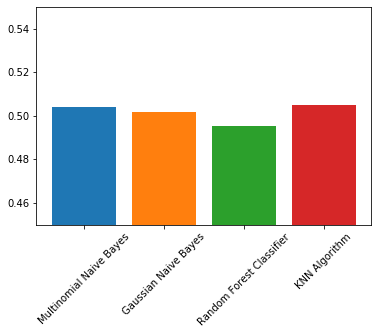

In [50]:
for name, model in models:

    model.fit(X, TrainLabel)

    score = model.score(Xtest, TestLabel)
    
    plt.bar(name, score)
    print("Accuracy of", name, ":", score)

plt.ylim(ymin=0.45, ymax=0.55)
plt.xticks(rotation=45)
plt.show()



### Output : 
Accuracy of Multinomial Naive Bayes : 0.5042058386937159  
Accuracy of Gaussian Naive Bayes : 0.5017318159327065  
Accuracy of Random Forest Classifier : 0.49925779317169716  
Accuracy of KNN Algorithm : 0.5049480455220188  
  

## Evaluation of Task A against different Models :   


| Best Performance |     Worst Performance    |
|:----------------:|:------------------------:|
|   KNN Algorithm  | Random Forest Classifier |
|      50.49 %     |          49.92 %         |
    
As we can see from the graph, The accuracy between the models does not differ much (hardly by 1-2 %).  
Still, The KNN algorithm performs best out of the 4 models whereas Random forest performs the worst.  
  

| Mean Accuracy | 50.42 % |
|---------------|---------|    
  
    
      
  

## Task B: Explanation (Multi-Choice)

**In task B, I have implemented 2 approaches :**
1. Using Text classification   
2. Using N-gram language model    
  
In the text classification, I have followed a similar process as the first problem and used 4 models for comparison of accuracy.  

### File Handling : 

In [51]:
trainDatadf = pd.read_csv(
    "Training  Data/Training  Data/subtaskB_data_all.csv", encoding="utf-8"
)
trainLabeldf = pd.read_csv(
    "Training  Data/Training  Data/subtaskB_answers_all.csv",
    encoding="utf-8",
    header=None,
)

trialDatadf = pd.read_csv(
    "Trial Data/Trial Data/taskB_trial_data.csv", encoding="utf-8"
)
trialLabeldf = pd.read_csv(
    "Trial Data/Trial Data/taskB_trial_answer.csv", encoding="utf-8", header=None
)


In [52]:
# rename columns of label
trainLabeldf.rename(columns={0: "id", 1: "answer"}, inplace=True)
trialLabeldf.rename(columns={0: "id", 1: "answer"}, inplace=True)

Here, I have used Label Encoder, which converts the labels/classes with numberic values.  

In [53]:
LE = LabelEncoder()
trainLabeldf["label"] = LE.fit_transform(trainLabeldf["answer"])
trialLabeldf["label"] = LE.fit_transform(trialLabeldf["answer"])

In [54]:
# merge label and data
trainDatadf = trainDatadf.merge(trainLabeldf, on="id")
trialDatadf = trialDatadf.merge(trialLabeldf, on="id")

Here, I have taken the Correct list of answers using the labels.  

In [55]:
correctData = []
correctLabel = []

for index, row in trainDatadf.iterrows():
    if row["answer"] == "A":
        correctData.append(str(row["OptionA"]))
        correctLabel.append(row["label"])

    elif row["answer"] == "B":
        correctData.append(str(row["OptionB"]))
        correctLabel.append(row["label"])

    elif row["answer"] == "C":
        correctData.append(str(row["OptionC"]))
        correctLabel.append(row["label"])

For the unseen data (Test Data), We have to take both right and wrong answers.  

In [56]:
correctDataTrial = []
wrongtDataTrial = []
correctTrialLabel = []
wrongTrialLabel = []
for index, row in trialDatadf.iterrows():
    if row["answer"] == "A":
        correctDataTrial.append(str(row["OptionA"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionB"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))
    elif row["answer"] == "B":
        correctDataTrial.append(str(row["OptionB"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionA"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))
    elif row["answer"] == "C":
        correctDataTrial.append(str(row["OptionC"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionB"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))

Flattening the numpy array for both Train and test data.  

In [57]:
TrainData = np.array([*correctData]).flatten()
TrainLabel = np.array([*correctLabel]).flatten()

TestData = np.array([*correctDataTrial, *wrongtDataTrial]).flatten()
TestLabel = np.array([*correctTrialLabel, *wrongTrialLabel]).flatten()


Checking the dimensions and length of the data.  

In [58]:
# # Checking the Dimensions ##
# print(len(correctData), len(correctLabel))
# print(len(correctDataTrial), len(correctTrialLabel))
# print(len(wrongtData), len(wrongLabel))
# print(len(wrongtDataTrial), len(wrongTrialLabel))

Tokenizing and Feature extraction using TF-IDF Vectorizer  

In [59]:
vectorizer = TfidfVectorizer(
    stop_words="english", ngram_range=(1, 3), max_features=28461
)

# print(len(vectorizer.get_feature_names()))

X = vectorizer.fit_transform(TrainData).toarray()

Xtest = vectorizer.fit_transform(TestData).toarray()

I have used four models for Accuracy comparison.  

In [60]:
models = [
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Random Forest Classifier", RandomForestClassifier(n_estimators=100, max_depth=2)),
    ("KNN Algorithm", KNeighborsClassifier(algorithm="brute", n_neighbors=3)),
    # ("SVM", SVC(gamma="scale")),
    # ("LDA", LinearDiscriminantAnalysis()),
    # ("Decision Tree Classifier", DecisionTreeClassifier(label=TrainLabel)),
]

### Hyper-parameter Tuning :

In [61]:
### Hyperparameter Testing ###
# knn = KNeighborsClassifier()
# scores = model_selection.cross_val_score(knn, X, TrainLabel, cv=10)
# print(scores.mean())
# param_grid = [{"n_neighbors": list(range(1, 10)), "p": [1, 2, 3, 4, 5]}]
# clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, n_jobs=-1)
# clf.fit(X, TrainLabel)
# print("\n Best parameters set found on development set:")
# print(clf.best_params_, "with a score of ", clf.best_score_)

# rfc=RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [100, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [1,2,3,4,5],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X, TrainLabel)
# print(CV_rfc.best_params_,"with a score of ", CV_rfc.best_score_)

Train and calculate the score for each model.  

Accuracy of Multinomial Naive Bayes : 0.3420748804222332
Accuracy of Gaussian Naive Bayes : 0.34553851228764637
Accuracy of Random Forest Classifier : 0.32690087415470886
Accuracy of KNN Algorithm : 0.33250865907966354


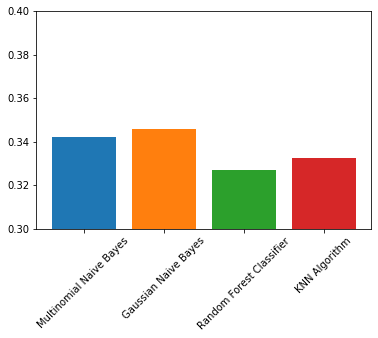

In [62]:
for name, model in models:

    model.fit(X, TrainLabel)

    score = model.score(Xtest, TestLabel)
    
    plt2.bar(name, score)
    print("Accuracy of", name, ":", score)
    
plt2.ylim(ymin=0.30, ymax=0.40)
plt2.xticks(rotation=45)
plt2.show()


### Output :   
Accuracy of Multinomial Naive Bayes : 0.3420748804222332  
Accuracy of Gaussian Naive Bayes : 0.34553851228764637  
Accuracy of Random Forest Classifier : 0.32657100445324094  
Accuracy of KNN Algorithm : 0.33250865907966354  
  

## Evaluation of Task B against different Models :   
  
    

|   Best Performance   |     Worst Performance    |
|:--------------------:|:------------------------:|
| Gaussian Naive Bayes | Random Forest Classifier |
|        34.55 %       |          32.65 %         |  
  
    
As we can see from the graph, The accuracy between the models lies somewhere between 32 to 35 %.  
The Gaussian Navie Bayes algorithm performs best out of the 4 models whereas Random forest performs the worst.  
  

| Mean Accuracy | 33.66 % |
|---------------|---------|    

## Using N-gram language model 

Other than text classification, I have also tried to find the Accuracy with N-Gram language model for Task B,  
But I have not completed the code yet.  

In [ ]:
trainDatadf = pd.read_csv(
    "Training  Data/Training  Data/subtaskB_data_all.csv", encoding="utf-8"
)
trainLabeldf = pd.read_csv(
    "Training  Data/Training  Data/subtaskB_answers_all.csv",
    encoding="utf-8",
    header=None,
)

trialDatadf = pd.read_csv(
    "Trial Data/Trial Data/taskB_trial_data.csv", encoding="utf-8"
)
trialLabeldf = pd.read_csv(
    "Trial Data/Trial Data/taskB_trial_answer.csv", encoding="utf-8", header=None
)

# name columns of label
trainLabeldf.rename(columns={0: "id", 1: "answer"}, inplace=True)
trialLabeldf.rename(columns={0: "id", 1: "answer"}, inplace=True)


LE = LabelEncoder()
trainLabeldf["label"] = LE.fit_transform(trainLabeldf["answer"])
trialLabeldf["label"] = LE.fit_transform(trialLabeldf["answer"])


# merge label and data
trainDatadf = trainDatadf.merge(trainLabeldf, on="id")
trialDatadf = trialDatadf.merge(trialLabeldf, on="id")


correctData = []
correctLabel = []

for index, row in trainDatadf.iterrows():
    if row["answer"] == "A":
        correctData.append(str(row["OptionA"]))
        correctLabel.append(row["label"])

    elif row["answer"] == "B":
        correctData.append(str(row["OptionB"]))
        correctLabel.append(row["label"])

    elif row["answer"] == "C":
        correctData.append(str(row["OptionC"]))
        correctLabel.append(row["label"])


# print(len(correctData), len(correctLabel))

correctDataTrial = []
wrongtDataTrial = []
correctTrialLabel = []
wrongTrialLabel = []
for index, row in trialDatadf.iterrows():
    if row["answer"] == "A":
        correctDataTrial.append(str(row["OptionA"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionB"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))
    elif row["answer"] == "B":
        correctDataTrial.append(str(row["OptionB"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionA"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))
    elif row["answer"] == "C":
        correctDataTrial.append(str(row["OptionC"]))
        correctTrialLabel.append(row["label"])

        wrongtDataTrial.append(str(row["OptionB"]))
        wrongtDataTrial.append(str(row["OptionC"]))
        wrongTrialLabel.extend((row["label"], row["label"]))


text = " ".join(correctData)
tokenized_text = [
    list(map(str.lower, word_tokenize(sent))) for sent in sent_tokenize(text)
]


n = 3
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)

model = MLE(n)

model.fit(train_data, padded_sents)

# print(model.counts['cereal'])
for index, row in trialDatadf.iterrows():
    # print(model.score(row["sent0"].split()))

    tokenized_optA = sent_tokenize(row["OptionA"])
    print(model.score(tokenized_optA))
    tokenized_optB = sent_tokenize(row["OptionB"])
    print(model.score(tokenized_optB))
    tokenized_optC = sent_tokenize(row["OptionC"])
    print(model.score(tokenized_optC))

# print(trainDatadf.columns)

## Task C: Explanation (Generation)

In the third task , I have tried 2 approaches:    
1. Word Level Neural Language model with LSTM.   
2. BERT language model for generation of text.  
  

## Word-Level Neural Language model with LSTM

### Sorting Imports :
  
Here, I have used Keras library and Tensarflow in the backend.  

In [ ]:
import string
from pickle import dump, load
from random import randint

from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from numpy import array

### File Handling :  
  
In the snippet below, I have used 3 functions :  
1. load_doc : for loading the document in memory.  
2. save_doc : for saving the respective tokens in the file.  
3. clean_doc: for cleaning the data(lowercase,whitespace,special characters) and tokenizing the cleaned data.  
  

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, "r")
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace("--", " ")
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans("", "", string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens


# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = "\n".join(lines)
    file = open(filename, "w")
    file.write(data)
    file.close()

### Driver code for Tokenizing and sequence generation :  


In [ ]:
## Driver Code ##

# load document
in_filename = "Training  Data/Training  Data/subtaskC_answers_all.csv"
doc = load_doc(in_filename)


# clean document
tokens = clean_doc(doc)
print(tokens[:10])
print("Total Tokens: %d" % len(tokens))
print("Unique Tokens: %d" % len(set(tokens)))

# organize into sequences of tokens
length = 10 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i - length : i]
    # convert into a line
    line = " ".join(seq)
    # store
    sequences.append(line)
print("Total Sequences: %d" % len(sequences))

# save sequences to file
out_filename = "sequenced_Data.txt"
save_doc(sequences, out_filename)

### Train the model : 


Loading the file in memory and splitting the sentences by nextline.  

In [ ]:
# load
in_filename = "sequenced_Data.txt"
doc = load_doc(in_filename)
lines = doc.split("\n")

Tokenizing the thes lines from text using fit_on_texts method of tokenizer and generate the sequences.  

In [ ]:
# tokenizing and conversion of sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
# generating a vocab size
vocab_size = len(tokenizer.word_index) + 1

Separating the sequence generated to input and our sequences, and converting the output to_categorical which converts the vectors(classes) into binary matrix.  

In [ ]:
# separate into input and output
sequences = array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]


Defining a sequencial Model and using inbuild model LSTM for fitting the data.  

#### LSTM (Long Short Term Memory networks):  
Special kind of RNN which are cabpable of learning long-term dependacies.   
LSTM avoid the issue of long term dependancies which is sometimes necessary if we need to get recent information for the present task.  
LSTM works on chain like structure containing multiple neural networks inside which works on cell state.  

In [ ]:
# define model
model = Sequential()
#adding the vocab with vector space as 10, which we have specified in the sequence
model.add(Embedding(vocab_size, 10, input_length=seq_length))

#defininf the LSTM model with memory cells 100
model.add(LSTM(100, return_sequences=True))

#adding another layer of LSTM with 100 memory cells
model.add(LSTM(100))

#dense connectionwith 100 neurons
model.add(Dense(100, activation="relu"))

#softmax for normalising the probabilities
model.add(Dense(vocab_size, activation="softmax"))
print(model.summary())

### Compiling the Model

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# fit model
model.fit(X, y, batch_size=128, epochs=10)

# save the model(model.h5) in current directory
model.save("model.h5")

In [ ]:
# save the tokenizer
dump(tokenizer, open("tokenizer.pkl", "wb"))

### Load the model 

In [ ]:
# Load the model

# load cleaned text sequences
in_filename = "sequenced_Data.txt"
doc = load_doc(in_filename)
lines = doc.split("\n")
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model("model.h5")

# load the tokenizer
tokenizer = load(open("tokenizer.pkl", "rb"))



Generation of sequence from language model

In [ ]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating="pre")
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ""
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += " " + out_word
        result.append(out_word)
    return " ".join(result)

Generating a random seed and generate a sequence from the method above. 

In [ ]:
# select a seed text
seed_text = lines[randint(0, len(lines))]
print(seed_text + "\n")

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

## Output : 

212049/212049 [==============================] - 602s 3ms/step - loss: 6.4921 - acc: 0.0520    
Epoch 2/5  
212049/212049 [==============================] - 624s 3ms/step - loss: 6.2987 - acc: 0.1210  
Epoch 3/5  
212049/212049 [==============================] - 701s 3ms/step - loss: 5.9302 - acc: 0.1536  
Epoch 4/5  
212049/212049 [==============================] - 769s 3ms/step - loss: 5.7015 - acc: 0.1689  
Epoch 5/5  
212049/212049 [==============================] - 830s 4ms/step - loss: 5.6190 - acc: 0.1761  
dry insects are dictionaries language sharing is boards insect dry cleaners needs the shop naturally cow europe metal has limited space socks relatives is a continent high blood pressure cannot  
  
insect the dry cleaners is dry soil language   


### BERT (Bidirectional Encoder Representations from Transformers) :  
#### What is BERT ?  
BERT is a language model based on Transformer architecture.  
It is used to pre-train the unlabelled text from both the directions instead of the one-directional approach which we use in most of the models.  
i.e. It adds both the left and right side features and calculates conditional dependancy.  

In [ ]:
bertMaskedLM = BertForMaskedLM.from_pretrained("bert-base-uncased")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
trainDatadf = pd.read_csv(
    "Training  Data/Training  Data/subtaskC_data_all.csv", encoding="utf-8"
)
trainLabeldf = pd.read_csv(
    "Training  Data/Training  Data/subtaskC_answers_all.csv",
    encoding="utf-8",
    header=None,
)

trialDatadf = pd.read_csv(
    "Trial Data/Trial Data/taskC_trial_data.csv", encoding="utf-8"
)
trialLabeldf = pd.read_csv(
    "Trial Data/Trial Data/taskC_trial_references.csv", encoding="utf-8", header=None
)




In [ ]:
trainLabeldf.rename(
    columns={0: "id", 1: "answerA", 2: "answerB", 3: "answerC"}, inplace=True
)
trialLabeldf.rename(
    columns={0: "id", 1: "answerA", 2: "answerB", 3: "answerC"}, inplace=True
)

In [ ]:
def get_score(sentence):
    tokenize_input = tokenizer.tokenize(sentence)
    tensor_input = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)])
    predictions = bertMaskedLM(tensor_input)
    loss_fct = torch.nn.CrossEntropyLoss()
    loss = loss_fct(predictions.squeeze(), tensor_input.squeeze()).data
    return math.exp(loss)

In [ ]:
inputArr = (trainDatadf["FalseSent"]).tolist()


The BERT code is not completed due to time limitation on my part.  